In [270]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

In [271]:
df_train = pd.read_csv('./bike_15_16_train.csv', index_col = 0)

In [272]:
df_train.head()

,Counts,Sum_Duration,Hour,Day,Month,Year,atemperatue,humidity,temperature,windSpeed,Day_Name,weekday,Holiday
2015-01-01 00:00:00-05:00,54,48944.0,0,1,1,2015,-4.02,0.67,-4.02,0.04,Thursday,1,0
2015-01-01 01:00:00-05:00,114,79028.0,1,1,1,2015,-4.30,0.70,-4.30,0.43,Thursday,1,0
2015-01-01 02:00:00-05:00,100,67666.0,2,1,1,2015,-4.09,0.67,-4.09,0.57,Thursday,1,0
2015-01-01 03:00:00-05:00,16,31606.0,3,1,1,2015,-3.86,0.64,-3.86,0.55,Thursday,1,0
2015-01-01 04:00:00-05:00,8,5083.0,4,1,1,2015,-4.27,0.64,-4.27,0.47,Thursday,1,0


In [273]:
#Encode Season in the Data
season_range = range(1,13)
seasons = ['1']*3 + ['2']*3 +['3']*3 + ['4']*3
season_new = dict(zip(season_range, seasons))
df_train['Seasons'] = df_train['Month'].map(season_new)

#Hour Binning
hour_range = range(0,24)
bins = ['Night']*6 + ['Morning']*4 + ['Day']*7 + ['Evening']*7
hour_new = dict(zip(hour_range, bins))
df_train['Hour_binned'] = df_train['Hour'].map(hour_new)

#Hour_Dict_Factorization_Low Level
factor_hour = {'Night': 0, 'Morning':1, 'Day': 2, 'Evening': 3}
df_train['Hour_Reconvert'] = df_train['Hour_binned'].map(factor_hour)



In [274]:
df_train.head()

,Counts,Sum_Duration,Hour,Day,Month,Year,atemperatue,humidity,temperature,windSpeed,Day_Name,weekday,Holiday,Seasons,Hour_binned,Hour_Reconvert
2015-01-01 00:00:00-05:00,54,48944.0,0,1,1,2015,-4.02,0.67,-4.02,0.04,Thursday,1,0,1,Night,0
2015-01-01 01:00:00-05:00,114,79028.0,1,1,1,2015,-4.30,0.70,-4.30,0.43,Thursday,1,0,1,Night,0
2015-01-01 02:00:00-05:00,100,67666.0,2,1,1,2015,-4.09,0.67,-4.09,0.57,Thursday,1,0,1,Night,0
2015-01-01 03:00:00-05:00,16,31606.0,3,1,1,2015,-3.86,0.64,-3.86,0.55,Thursday,1,0,1,Night,0
2015-01-01 04:00:00-05:00,8,5083.0,4,1,1,2015,-4.27,0.64,-4.27,0.47,Thursday,1,0,1,Night,0


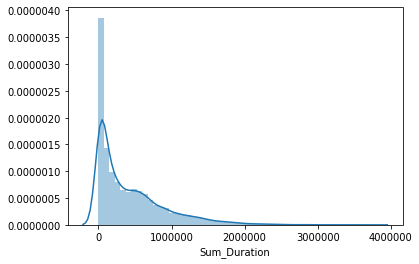

In [280]:
sns.distplot(df_train['Sum_Duration'])

In [281]:
df_train.isnull().sum() # number of missing values 

Counts            0
Sum_Duration      0
Hour              0
Day               0
Month             0
Year              0
atemperatue       0
humidity          0
temperature       0
windSpeed         0
Day_Name          0
weekday           0
Holiday           0
Seasons           0
Hour_binned       0
Hour_Reconvert    0
dtype: int64

In [282]:
df_train.nunique()

Counts             1476
Sum_Duration      12528
Hour                 24
Day                  26
Month                12
Year                  2
atemperatue        4347
humidity             84
temperature        3895
windSpeed          1769
Day_Name              7
weekday               2
Holiday               2
Seasons               4
Hour_binned           4
Hour_Reconvert        4
dtype: int64

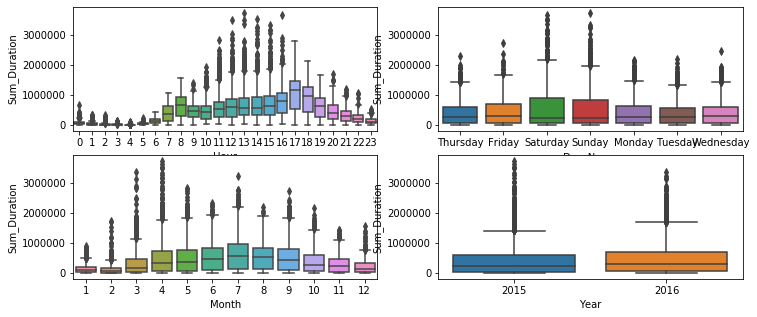

In [287]:
plt.figure(figsize = (12,5))
plt.subplot(2,2,1) # r, c, fignum
sns.boxplot(y = df_train['Sum_Duration'], x = df_train['Hour'])
plt.subplot(2,2,2) # r, c, fignum
sns.boxplot(y = df_train['Sum_Duration'], x = df_train['Day_Name'])
plt.subplot(2,2,3) # r, c, fignum
sns.boxplot(y = df_train['Sum_Duration'], x = df_train['Month'])
plt.subplot(2,2,4) # r, c, fignum
sns.boxplot(y = df_train['Sum_Duration'], x = df_train['Year'])

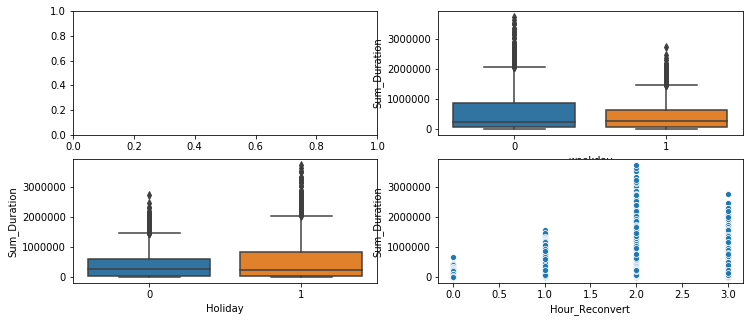

In [290]:
plt.figure(figsize = (12,5))
plt.subplot(2,2,1) # r, c, fignum
#sns.boxplot(y = df_train['Sum_Duration'], x = df_train['atemperatue'])
plt.subplot(2,2,2) # r, c, fignum
sns.boxplot(y = df_train['Sum_Duration'], x = df_train['weekday'])
plt.subplot(2,2,3) # r, c, fignum
sns.boxplot(y = df_train['Sum_Duration'], x = df_train['Holiday'])
plt.subplot(2,2,4) # r, c, fignum
sns.scatterplot(y = df_train['Sum_Duration'], x = df_train['Hour_Reconvert'])

In [307]:
df_train.columns

Index(['Counts', 'Sum_Duration', 'Hour', 'Day', 'Month', 'Year', 'atemperatue',
       'humidity', 'temperature', 'windSpeed', 'Day_Name', 'weekday',
       'Holiday', 'Seasons', 'Hour_binned', 'Hour_Reconvert'],
      dtype='object')

In [308]:
sc = MinMaxScaler()

In [309]:
sc.fit(df_train[['atemperatue']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [310]:
df_train['atemp_minmax'] = sc.transform(df_train[['atemperatue']])

In [116]:
poly = PolynomialFeatures(degree = 2)

In [192]:
poly.fit(df_train[['Month']])

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [193]:
df_train['Month_poly'] = sc.transform(df_train[['Month']])

In [311]:
df_train.head()

,Counts,Sum_Duration,Hour,Day,Month,Year,atemperatue,humidity,temperature,windSpeed,Day_Name,weekday,Holiday,Seasons,Hour_binned,Hour_Reconvert,atemp_minmax
2015-01-01 00:00:00-05:00,54,48944.0,0,1,1,2015,-4.02,0.67,-4.02,0.04,Thursday,1,0,1,Night,0,0.274742
2015-01-01 01:00:00-05:00,114,79028.0,1,1,1,2015,-4.30,0.70,-4.30,0.43,Thursday,1,0,1,Night,0,0.270549
2015-01-01 02:00:00-05:00,100,67666.0,2,1,1,2015,-4.09,0.67,-4.09,0.57,Thursday,1,0,1,Night,0,0.273694
2015-01-01 03:00:00-05:00,16,31606.0,3,1,1,2015,-3.86,0.64,-3.86,0.55,Thursday,1,0,1,Night,0,0.277137
2015-01-01 04:00:00-05:00,8,5083.0,4,1,1,2015,-4.27,0.64,-4.27,0.47,Thursday,1,0,1,Night,0,0.270999


In [312]:
categorical_columns = ['Hour_Reconvert', 'Seasons','weekday', 'Month']
df_train[categorical_columns] = df_train[categorical_columns].astype('category')
numerical_columns = ['atemp_minmax', 'windSpeed']
train_list = categorical_columns + numerical_columns
train_list

['Hour_Reconvert', 'Seasons', 'weekday', 'Month', 'atemp_minmax', 'windSpeed']

In [313]:
Xtrain = df_train[train_list]

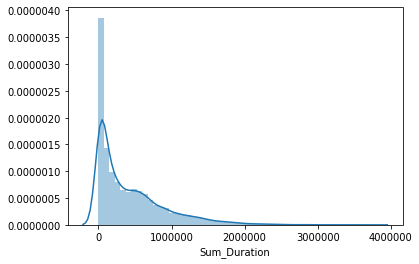

In [314]:
sns.distplot(df_train['Sum_Duration'])

In [315]:
import numpy as np
ytrain = np.log1p(df_train['Sum_Duration'])

In [316]:
#Scikit Linear Reg
m = Lasso(alpha = 0.1)

In [317]:
m.fit(Xtrain, ytrain), m.score(Xtrain, ytrain)

(Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False), 0.4088398381256356)

In [318]:
ypred = m.predict(Xtrain)
mean_squared_error(ytrain, ypred) #Scikit

1.9322402074510725

In [319]:
m.coef_ , m.intercept_, Xtrain.columns
l = zip(Xtrain.columns, m.coef_)
fit_coeff = pd.DataFrame(l, columns = ['Variables', 'Coefficients'], index = Xtrain.columns)
fit_coeff.drop('Variables', axis = 1)

,Coefficients
Hour_Reconvert,0.875239
Seasons,0.000000
weekday,-0.000000
Month,0.102626
atemp_minmax,0.000000
windSpeed,0.027041


In [320]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

2.41065988122475e-15


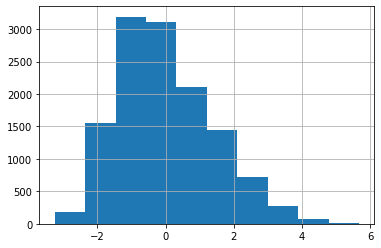

In [321]:
#Check the assumptions
#Mean residual is around zero
residuals = ypred - ytrain
print(residuals.mean())
residuals.hist()


((array([-3.8688066 , -3.64684923, -3.52513816, ...,  3.52513816,
          3.64684923,  3.8688066 ]),
  array([-3.25318692, -3.02975186, -2.97536034, ...,  5.25071635,
          5.54914773,  5.66930327])),
 (1.3726721479582331, 2.1174408188319824e-15, 0.9872129121755763))

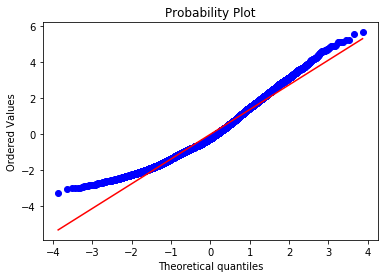

In [322]:
#Q-Q plot
probplot(residuals, plot=plt)

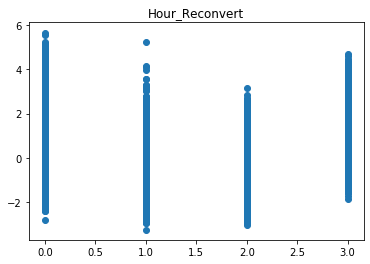

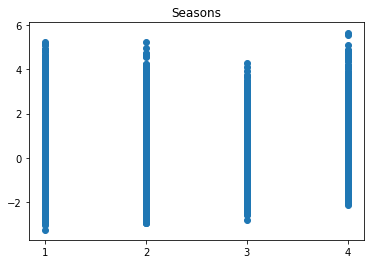

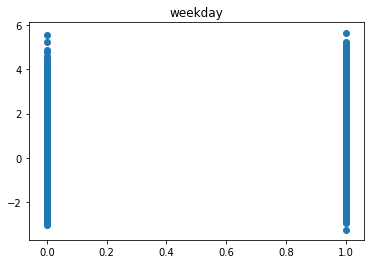

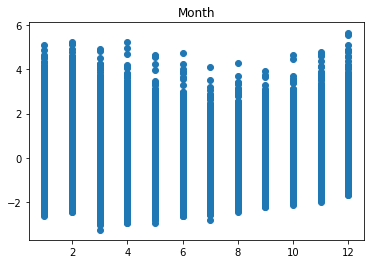

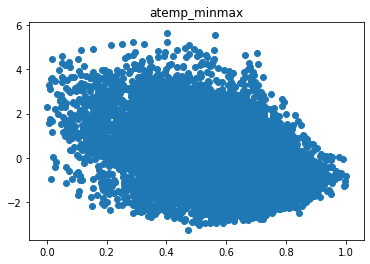

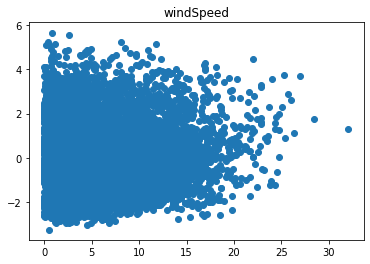

In [323]:
#Residuals uncorrelated with x and must be equally on and under 0

for column in Xtrain.columns:
    plt.scatter(Xtrain[column], residuals)
    plt.title(f'{column}')
    plt.show()